In [31]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram 
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np

In [3]:
# Define a function for creating a controlled unitary operator for a^power mod 15
def c_amod15(a, power):
    # Create a quantum circuit with 4 qubits
    U = QuantumCircuit(4)

    # Apply the controlled swaps and X gates based on the specified power
    for iteration in range(power):
        # Apply swaps to create the effect of the controlled modular multiplication
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)

        # Apply X gate to all qubits
        for q in range(4):
            U.x(q)

    # Convert the circuit to a gate
    U = U.to_gate()
    
    # Set the gate name to indicate the operation being performed
    U.name = "%i^%i mod 15" % (a, power)

    # Create the controlled version of the gate
    c_U = U.control()

    # Return the controlled gate
    return c_U


In [4]:
qubit_count = 8 # number of qubits we'll be using to count
a = 7 # this is our guess

In [16]:
# Define a function for creating the inverse Quantum Fourier Transform (QFT)
def qft_dagger(n):
    # Create a quantum circuit with n qubits
    qc = QuantumCircuit(n)

    # Apply swaps to reverse the order of qubits
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)

    # Apply controlled phase shifts and Hadamard gates
    for j in range(n):
        # Iterate over qubits m less than j
        for m in range(j):
            # Apply a controlled-phase gate with a decreasing angle
            qc.cp(-np.pi / float(2**(j - m)), m, j)
        
        # Apply Hadamard gate to the j-th qubit
        qc.h(j)

    # Set the name of the circuit to indicate that it is the inverse QFT
    qc.name = "QFT dagger"

    # Return the quantum circuit
    return qc

In [19]:
# Create a quantum circuit with qubit_count + 4 qubits, and qubit_count classical bits
qc = QuantumCircuit(qubit_count + 4, qubit_count)

# Apply Hadamard gates to the first qubit_count qubits
for q in range(qubit_count):
    qc.h(q)

# Apply X gate to the qubit at position 3 + qubit_count
qc.x(3 + qubit_count)

# Apply controlled modular exponentiation gates for each qubit in a loop
for q in range(qubit_count):
    qc.append(c_amod15(a, 2**q), [q] + [i + qubit_count for i in range(4)])

# Apply the inverse Quantum Fourier Transform to the first qubit_count qubits
qc.append(qft_dagger(qubit_count), range(qubit_count))

# Measure the first qubit_count qubits and map the result to classical bits
qc.measure(range(qubit_count), range(qubit_count))

# Draw the quantum circuit in text format
qc.draw('text')

┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │»
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
      ┌───┐│             ││             ││             ││             │»
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
 c: 8/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
« q_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_4: ───────■─────────────────────────────────────────────────────────»
«             │                                                         »
« q_5: ───────┼───────────────■─────────────────────────────────────────»
«             │               │                                         »
« q_6: ───────┼───────────────┼───────────────■─────────────────────────»
«             │               │               │                         »
« q_7: ───────┼───────────────┼───────────────┼────────────────■────────»
«      ┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐»
« q_8: ┤0             ├┤0             ├┤0             ├┤0              ├»
«      │              ││              ││              ││               │»
« q_9: ┤1             ├┤1             ├┤1             ├┤1              ├»
«      │  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │»
«q_10: ┤2             ├┤2             ├┤2             ├┤2              ├»
«      │              ││              ││              ││               │»
«q_11: ┤3             ├┤3             ├┤3             ├┤3              ├»
«      └──────────────┘└──────────────┘└──────────────┘└───────────────┘»
« c: 8/═════════════════════════════════════════════════════════════════»
«                                                                       »
«      ┌─────────────┐┌─┐            

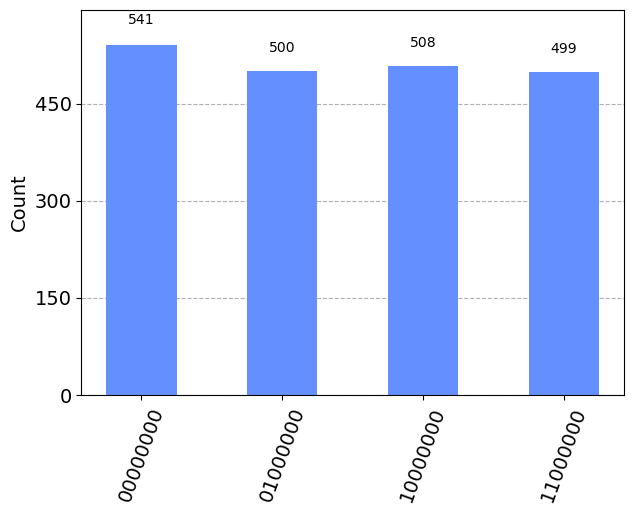

In [21]:
# Choose the Qiskit Aer backend for simulating quantum computation
backend = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the chosen backend, specifying the number of shots
result = execute(qc, backend, shots=2048).result()

# Get the counts of different measurement outcomes from the result
counts = result.get_counts()

# Plot a histogram of the measurement outcomes
plot_histogram(counts)

In [44]:
# Save account to disk. 
QiskitRuntimeService.save_account(channel="ibm_quantum", token="1b79f356170deeac5fdf52081b78581d5bc4f5708f124fa04b4f316ac96b16320f037201caf33bc8ab511d7af999dd07c8737051176abacfa5e318edee4e0837", name="mattalcasabas", overwrite=True)

In [45]:
service = QiskitRuntimeService(name="mattalcasabas")

In [46]:
backend = service.backend("ibm_brisbane")

In [ ]:
# Execute the quantum circuit on the chosen backend, specifying the number of shots
result = execute(qc, backend, shots=2048).result()

# Get the counts of different measurement outcomes from the result
counts = result.get_counts()

# Plot a histogram of the measurement outcomes
plot_histogram(counts)